<a href="https://colab.research.google.com/github/Candida18/ADS_SMA/blob/main/ADS/8960_Candida_Noronha_ADS_Practical_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>Name: Candida Noronha<br/>
### <b>Class: BE COMPS B<br/>
### <b>Roll No.: 8960
### <b>Practical 4 - Implement and explore performance evaluation metrics for Data Models (Supervised/Unsupervised Learning)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
plt.rcParams['figure.figsize']=[15,7]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SEM 8/Applied Data Science/Experiment4/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df = df.drop('User ID',axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Encoding the categorical columns

In [ ]:
df['Gender'] = df['Gender'].replace({'Female':0,'Male':1})
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
y = df['Purchased']
x = df.drop('Purchased',axis=1)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=4)

In [ ]:
# checking the shape of the train and test datasets
print("The shape of xtrain is: ",xtrain.shape)
print("The shape of xtest is: ",xtest.shape)
print("The shape of ytrain is: ",ytrain.shape)
print("The shape of ytest is: ",ytest.shape)

The shape of xtrain is:  (300, 3)
The shape of xtest is:  (100, 3)
The shape of ytrain is:  (300,)
The shape of ytest is:  (100,)


In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
xtrain= st_x.fit_transform(xtrain)    
xtest= st_x.transform(xtest) 

Initialising Logistic Regression

In [ ]:
# initializing the Logistic Regression:

logreg = LogisticRegression()

logreg_model = logreg.fit(xtrain,ytrain)

print(logreg_model)

LogisticRegression()


In [ ]:
# predicting the model on train and test sets

ytrain_pred = logreg_model.predict(xtrain)

ytest_pred = logreg_model.predict(xtest)

### Accuracy Score

In [ ]:
#train
accuracy_score(ytrain,ytrain_pred)

0.8366666666666667

In [ ]:
#test
accuracy_score(ytest,ytest_pred)

0.7

### Classification Report

In [ ]:
# train

print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       187
           1       0.83      0.71      0.77       113

    accuracy                           0.84       300
   macro avg       0.84      0.81      0.82       300
weighted avg       0.84      0.84      0.83       300



In [ ]:
# test

print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        70
           1       0.81      0.73      0.77        30

    accuracy                           0.87       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.87      0.87      0.87       100



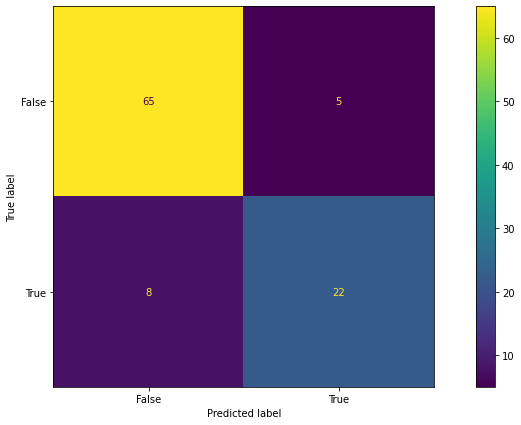

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

confusion_matrix = confusion_matrix(ytest,ytest_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Area Under the Curve

In [ ]:
#use model to predict probability that given y value is 1
y_pred_proba = logreg.predict_proba(xtest)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(ytest, y_pred_proba)

#print AUC score
print(auc)

0.9319047619047619


Mean Absolute Error

In [ ]:
metrics.mean_absolute_error(ytest, ytest_pred)

0.13

Mean Squared Error

In [ ]:
metrics.mean_squared_error(ytest, ytest_pred)

0.13

R2 Score

In [ ]:
R2 = metrics.r2_score(ytest, ytest_pred)

In [ ]:
# Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
# Where n is the sample size and p is the number of independent variables.

Adj_r2 = 1-(1-R2)*(400-1)/(400-2-1)
Adj_r2

0.37783375314861445